In [1]:
# Importamos las librerías que necesitamos

# Librerías de extracción de datos
# -----------------------------------------------------------------------

%load_ext autoreload
%autoreload 2

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

import sys
sys.path.append('..')
from src import funciones as f

import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../Datos/df_decodificado.csv', index_col=0)

In [3]:
df.head()

,region,provincia,diasemana,mesocu,anoocu,rhora,sexo,lugarocu,medioemp,motivo,grupoedad
0,Región Cibao Norte,Espaillat,No declarado,Noviembre,2007,No declarado,Hombres,"Vivienda, domicilio o residencia","Sustancia tóxica, veneno","Conflicto familiar, violencia intrafamiliar y ...",No declarado
1,Región Cibao Norte,Espaillat,No declarado,Julio,2007,No declarado,Hombres,"Vivienda, domicilio o residencia","Sustancia tóxica, veneno",Otros problemas de salud,35 - 39
2,Región Cibao Norte,Espaillat,No declarado,Septiembre,2007,No declarado,Hombres,"Vivienda, domicilio o residencia",Arma de fuego,Otros,20 - 24
3,Región Cibao Norte,Espaillat,No declarado,Enero,2007,No declarado,Hombres,"Hotel, motel, pensión, cabaña",Arma de fuego,No declarado,30 - 34
4,Región Cibao Norte,Espaillat,No declarado,Febrero,2007,No declarado,Hombres,"Vía pública, parque","Sustancia tóxica, veneno",No declarado,20 - 24


## Suicidios R.D. 2007 - 2023

- No existen nulos, aunque sí duplicados. Sin embargo, estos pueden explicarse por similitud de escenarios ya que no existen variables como fecha exacta para determinar una diferencia más marcada. Aun así, es extaño que sean situaciones tan similares en particular si se encuentran los registros uno seguido del otro.
- La región Ozama (específicamente SD) es la que posee mayor cantidad de suicidios. Seguido de Cibao Norte y Cibao Sur. Lógico a la ubicación de provincias importantes como Santigo y La Vega. 
- Aunque el día con mayores registros queda en 'No declarado', los días identificados son lunes y domingo.
- Los meses con mayor cantidad de suicios son los de verano, julio y junio. 
- El horario más propenso a un suicidio va entre 8-10 AM, seguido de 10-12.
- El lugar más señalado para ejecutar la acción es el propio hora, con un 55%. 
- Cerca del 60% son realizados a través de ahorcamiento o asfixia, le siguen las sustancias tóxicas y las armas de fuego. Estas últimas por debajo de un 20% ambas.
- entre los motivos se encuentran muchos casos (más del 40%) sin declaración, entendible considerando el tipo de hecho. Le sigue factores que influyen de manera directa la salud mental: depresión, conflicto familiar-violencia.
En general, el rango de edad con mayor presencia resulta una sorpresa: 65 años y más.  
- Los hombres son el 85% de los casos de suicidios, el resto son las mujeres. Esto quiere decir que 8 de de cada 10 suicidios son de hombres.
    -  Factores asociados al suicidio por sexo: 
Hombres: Las tasas más altas en hombres se asocian a factores como el estigma en torno a la salud mental, normas de masculinidad que desalientan la expresión emocional y menor propensión a buscar ayuda profesional. ​

Mujeres: Aunque las tasas de suicidio consumado son más bajas en mujeres, los estudios indican que las mujeres hispanas y latinas, especialmente las adolescentes, reportan mayores niveles de pensamientos e intentos de suicidio que los hombres. Esto podría deberse a su mayor exposición a factores como la pobreza, la violencia y la baja autoestima. ​

Al profundizar en el género y la edad, los hombres destacan por recurrir al suicidio después de los 65 años (13% de los casos), seguido de grupos de 25-29 y 30-34 años. Entre los 20-40, cada grupo concentra un 10% del total de los casos

Las mujeres tienen mayor presencia en la población joven (15-24 años) con más del 25% en esos 2 grupos. Al contrario de los hombres, las mujeres mayores de 65 están en los grupos con menos casos.

In [4]:
f.exploracion_dataframe(df)

El número de datos es 10035 y el de columnas es 11

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 33

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
region,object
provincia,object
diasemana,object
mesocu,object
anoocu,int64
rhora,object
sexo,object
lugarocu,object
medioemp,object
motivo,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna region tiene los siguientes valores únicos:


,count
region,
Región Ozama,2693
Región Cibao Norte,1989
Región Cibao Sur,912
Región Valdesia,861
Región Cibao Nordeste,771
Región Yuma,715
Región El Valle,610
Región Higuamo,580
Región Cibao Noroeste,563


La columna provincia tiene los siguientes valores únicos:


,count
provincia,
Santo Domingo,1835
Santiago,1285
Distrito Nacional,858
La Vega,566
San Cristóbal,518
La Altagracia,416
Puerto Plata,409
Duarte,353
San Juan,334


La columna diasemana tiene los siguientes valores únicos:


,count
diasemana,
No declarado,1604
Lunes,1371
Domingo,1364
Martes,1198
Miércoles,1161
Sábado,1151
Jueves,1115
Viernes,1071


La columna mesocu tiene los siguientes valores únicos:


,count
mesocu,
Julio,933
Junio,913
Octubre,894
Septiembre,884
Agosto,869
Mayo,844
Diciembre,817
Abril,807
Enero,790


La columna rhora tiene los siguientes valores únicos:


,count
rhora,
No declarado,1651
08:01-10:00,1169
10:01-12:00,1095
06:01-08:00,884
14:01-16:00,858
16:01-18:00,815
12:01-14:00,757
18:01-20:00,742
20:01-22:00,583


La columna sexo tiene los siguientes valores únicos:


,count
sexo,
Hombres,8570
Mujeres,1465


La columna lugarocu tiene los siguientes valores únicos:


,count
lugarocu,
"Vivienda, domicilio o residencia",5528
No declarado,2354
"Vía pública, parque",1090
"Finca, parcela, terreno baldío, solar y afines",337
"Hotel, motel, pensión, cabaña",147
Trabajo,103
"Cárcel, cuartel, fortaleza, puesto de chequeo",78
Puente,73
"Otro establecimiento comercial, empresa con servicio al público",50


La columna medioemp tiene los siguientes valores únicos:


,count
medioemp,
"Ahorcamiento, asfixia respiratoria",5858
"Sustancia tóxica, veneno",1988
Arma de fuego,1584
Lanzamiento al vacío,294
"Arma blanca, cortopunzante",115
Asfixia por inmersión,78
"Fuego, vapores, objetos calientes",60
Otros,53
No declarado,5


La columna motivo tiene los siguientes valores únicos:


,count
motivo,
No declarado,4261
"Depresión, problemas de salud mental",2813
"Conflicto familiar, violencia intrafamiliar y de género",1674
Otros problemas de salud,722
Problemas económicos,485
Otros,45
Problemas judiciales,16
"Regaños, reproches",10
"Acoso, abuso sexual",9


La columna grupoedad tiene los siguientes valores únicos:


,count
grupoedad,
65 y más,1230
20 - 24,1024
25 - 29,999
30 - 34,967
35 - 39,944
40 - 44,901
45 - 49,792
50 - 54,742
55 - 59,613


In [5]:
df[df.duplicated(keep=False)] # de esta forma veo el original y el duplicado

,region,provincia,diasemana,mesocu,anoocu,rhora,sexo,lugarocu,medioemp,motivo,grupoedad
300,Región Cibao Norte,Puerto Plata,No declarado,Mayo,2007,No declarado,Hombres,"Vivienda, domicilio o residencia","Ahorcamiento, asfixia respiratoria",No declarado,25 - 29
301,Región Cibao Norte,Puerto Plata,No declarado,Mayo,2007,No declarado,Hombres,"Vivienda, domicilio o residencia","Ahorcamiento, asfixia respiratoria",No declarado,25 - 29
707,Región Cibao Norte,Santiago,No declarado,Octubre,2007,No declarado,Hombres,"Vivienda, domicilio o residencia",Arma de fuego,"Conflicto familiar, violencia intrafamiliar y ...",30 - 34
708,Región Cibao Norte,Santiago,No declarado,Octubre,2007,No declarado,Hombres,"Vivienda, domicilio o residencia",Arma de fuego,"Conflicto familiar, violencia intrafamiliar y ...",30 - 34
786,Región Cibao Norte,Santiago,No declarado,Noviembre,2008,No declarado,Hombres,"Vivienda, domicilio o residencia","Sustancia tóxica, veneno",No declarado,30 - 34
...,...,...,...,...,...,...,...,...,...,...,...
9289,Región Ozama,Santo Domingo,No declarado,Junio,2009,No declarado,Hombres,"Vivienda, domicilio o residencia","Ahorcamiento, asfixia respiratoria",Problemas económicos,20 - 24
9300,Región Ozama,Santo Domingo,No declarado,Diciembre,2009,No declarado,Hombres,"Vivienda, domicilio o residencia","Ahorcamiento, asfixia respiratoria",No declarado,15 - 19
9616,Región Ozama,Santo Domingo,Domingo,Marzo,2019,02:01-04:00,Hombres,No declarado,Arma de fuego,"Depresión, problemas de salud mental",50 - 54
9792,Región Ozama,Santo Domingo,No declarado,Julio,2008,No declarado,Hombres,"Vivienda, domicilio o residencia",Arma de fuego,No declarado,No declarado


In [6]:
df['anoocu'].value_counts()

anoocu
2021    670
2023    669
2018    648
2012    638
2011    637
2022    609
2019    607
2020    597
2017    575
2016    569
2013    567
2009    563
2014    557
2015    547
2010    541
2008    529
2007    512
Name: count, dtype: int64

In [ ]:
df['sexo'].value_counts(normalize=True) *100 #visualizar porcentaje por género

sexo
Hombres   85.40
Mujeres   14.60
Name: proportion, dtype: float64

In [ ]:
df['lugarocu'].value_counts(normalize=True) * 100 #visualizar porcentaje por lugar donde ocurrió

lugarocu
Vivienda, domicilio o residencia                                            55.09
No declarado                                                                23.46
Vía pública, parque                                                         10.86
Finca, parcela, terreno baldío, solar y afines                               3.36
Hotel, motel, pensión, cabaña                                                1.46
Trabajo                                                                      1.03
Cárcel, cuartel, fortaleza, puesto de chequeo                                0.78
Puente                                                                       0.73
Otro establecimiento comercial, empresa con servicio al público              0.50
Río, cañada, canal, lago, laguna                                             0.47
Centros educativos, centros de salud y otras instalaciones públicas)         0.40
Colmado, discoteca, bar, colmadón                                            0.40
Interio

In [9]:
df_num, df_cat = f.separar_dataframes(df)

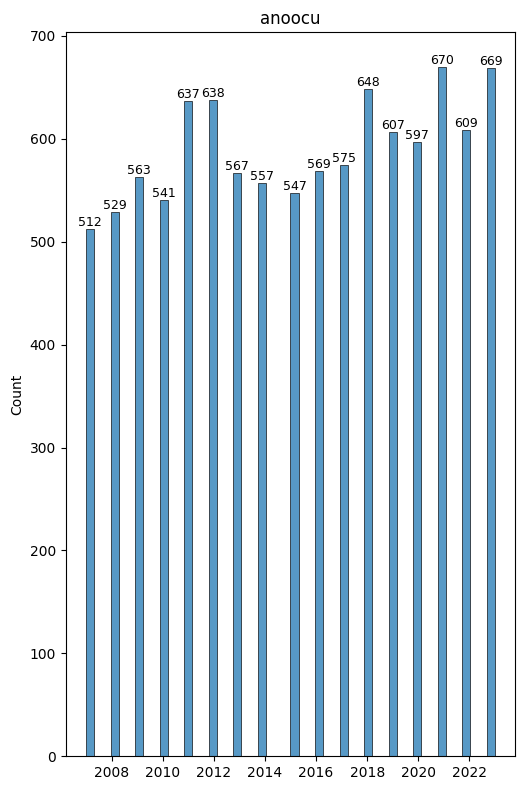

In [10]:
f.plot_numericas(df_num)

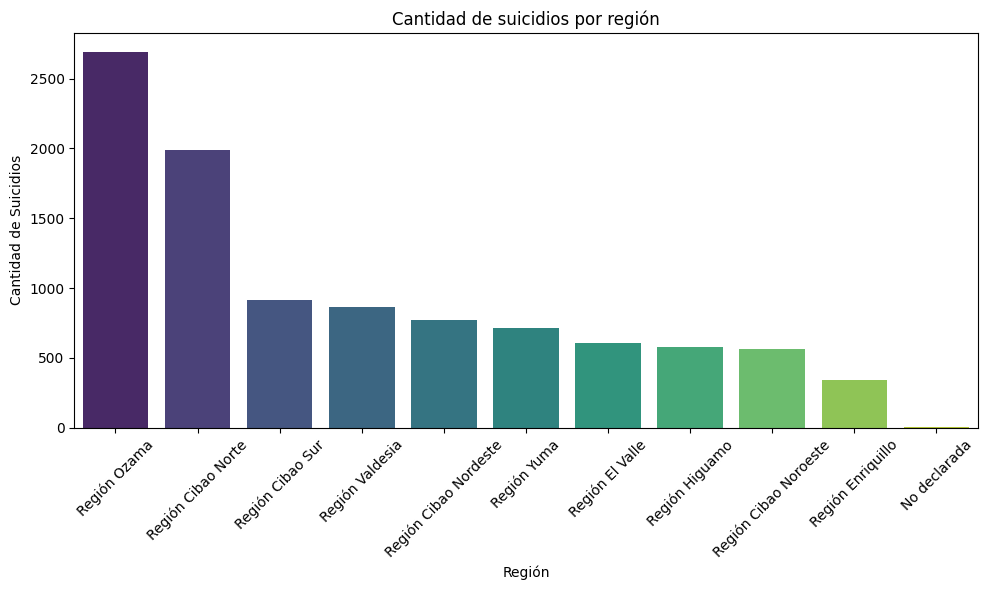

In [ ]:
# crear un conteo de suicidios por región
conteo_region = df['region'].value_counts().reset_index()
conteo_region.columns = ['region', 'suicidios']

# crear el barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=conteo_region, x='region', y='suicidios', palette='viridis')

plt.title('Cantidad de suicidios por región')
plt.xlabel('Región')
plt.ylabel('Cantidad de Suicidios')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
df_genero_edad = df.groupby(['sexo', 'grupoedad'])[['region']].count().sort_values(by=['sexo', 'region'], ascending=[True, False])
df_genero_edad.rename(columns={'region': 'Conteo'}, inplace=True)
df_genero_edad['Total por Sexo'] = df_genero_edad.groupby(level=0)['Conteo'].transform('sum')
df_genero_edad['Porcentaje (%)'] = (df_genero_edad['Conteo'] / df_genero_edad['Total por Sexo']) * 100
df_genero_edad

Conteo  Total por Sexo  Porcentaje (%)
sexo    grupoedad                                           
Hombres 65 y más        1138            8570           13.28
        25 - 29          856            8570            9.99
        30 - 34          850            8570            9.92
        20 - 24          823            8570            9.60
        35 - 39          818            8570            9.54
        40 - 44          767            8570            8.95
        45 - 49          692            8570            8.07
        50 - 54          670            8570            7.82
        55 - 59          554            8570            6.46
        60 - 64          476            8570            5.55
        No declarado     396            8570            4.62
        15 - 19          370            8570            4.32
        10 - 14          138            8570            1.61
        6 - 9             22            8570            0.26
Mujeres 15 - 19          201            1465           13.72
        20 - 24          201            1465           13.72
        25 - 29          143            1465            9.76
        40 - 44          134            1465            9.15
        35 - 39          126            1465            8.60
        10 - 14          118            1465            8.05
        30 - 34          117            1465            7.99
        45 - 49          100            1465            6.83
        65 y más          92            1465            6.28
        50 - 54           72            1465            4.91
        55 - 59           59            1465            4.03
        60 - 64           57            1465            3.89
        No declarado      36            1465            2.46
        6 - 9              9            1465            0.61